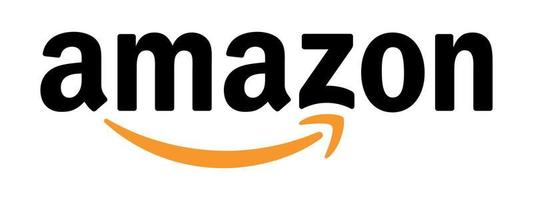

In [411]:
from IPython.display import Image, display

# Display an image file
display(Image(filename='example.jpg'))

# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Amazon Sales Analysis</span> </div>

In [ ]:
# Importing NumPy library and aliasing it as np
import numpy as np  

# Importing Pandas library and aliasing it as pd
import pandas as pd  

# Importing Matplotlib's pyplot module and aliasing it as plt
import matplotlib.pyplot as plt  

# Importing Seaborn library and aliasing it as sns
import seaborn as sns  

In [2]:
# Reading the CSV file "Amazon Sales data.csv" into a Pandas DataFrame and setting the first column as the index
amz = pd.read_csv("Amazon Sales data.csv", index_col=0)

In [3]:
# Checking the shape of the DataFrame to see the number of rows and columns
amz.shape

(100, 13)

In [4]:
# Displaying the first few rows of the DataFrame to get an overview of the data
amz.head()

,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Region,,,,,,,,,,,,,
Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### TOTAL SALES

In [362]:
# Calculating the total sales by summing up the 'Total Revenue' column and rounding it to 2 decimal places
Total_Sales = round((amz['Total Revenue'].sum()/1000000),2)

# Printing the total sales in millions with appropriate formatting
print("Total Sales : $ {} M".format(Total_Sales))

Total Sales : $ 137.35 M


### TOTAL COST

In [361]:
# Calculating the total cost by summing up the 'Total Cost' column and rounding it to 2 decimal places
Total_Cost = round((amz['Total Cost'].sum()/1000000),2)

# Printing the total cost in millions with appropriate formatting
print("Total Cost : $ {} M".format(Total_Cost))

Total Cost : $ 93.18 M


### TOTAL PROFIT

In [360]:
# Calculating the total profit by summing up the 'Total Profit' column and rounding it to 2 decimal places
Total_Profit = round((amz['Total Profit'].sum()/1000000),2)

# Printing the total profit in millions with appropriate formatting
print("Total Profit : $ {} M".format(Total_Profit))

Total Profit : $ 44.17 M


### TOTAL UNITS SOLD

In [359]:
# Calculating the total units sold by summing up the 'Units Sold' column
Total_Units_Sold = amz['Units Sold'].sum()

# Printing the total units sold
print("Total Units Sold : {}".format(Total_Units_Sold))

Total Units Sold : 512871


### TOTAL ORDERS COUNT

In [358]:
# Counting the total number of orders by counting the unique values in the 'Order ID' column
Total_orders = amz['Order ID'].count()

# Printing the total number of orders
print("Total orders :", Total_orders)

Total orders : 100


### ORDER PRIORITY WISE SALES

In [11]:
# Mapping dictionary to convert priority codes to their corresponding names
Priority_abbr = { 'C' : 'Critical' , 'H' : 'High' , 'L' : 'Low' , 'M' : 'Medium'}

In [363]:
# Grouping the DataFrame by 'Order Priority' and calculating the sum of 'Total Revenue'
Priority_wise = amz.groupby('Order Priority')['Total Revenue'].sum()

# Converting the resulting Series to a DataFrame and resetting the index to make 'Order Priority' a column
Priority_wise = Priority_wise.reset_index()

# Mapping the priority codes to their corresponding names using the mapping dictionary 'Priority_abbr'
Priority_wise['Order Priority'] = Priority_wise['Order Priority'].map(Priority_abbr)

# Converting 'Total Revenue' to million dollars and rounding off to two decimal places
Priority_wise['Total Revenue'] = round(Priority_wise['Total Revenue'] / 1000000, 2)

# Renaming the 'Total Revenue' column to 'Total Sales (in Mill.)'
Priority_wise.rename(columns={'Total Revenue': 'Total Sales (in Mill.)'}, inplace=True)

# Sorting the DataFrame by 'Total Sales (in Mill.)' in descending order
Priority_wise.sort_values(by='Total Sales (in Mill.)', ascending=False, inplace=True)

# Printing the DataFrame
Priority_wise

,Order Priority,Total Sales (in Mill.)
1,High,48.75
2,Low,36.63
3,Medium,33.12
0,Critical,18.86


### VISUALIZING ORDER PRIORITY WISE SALES

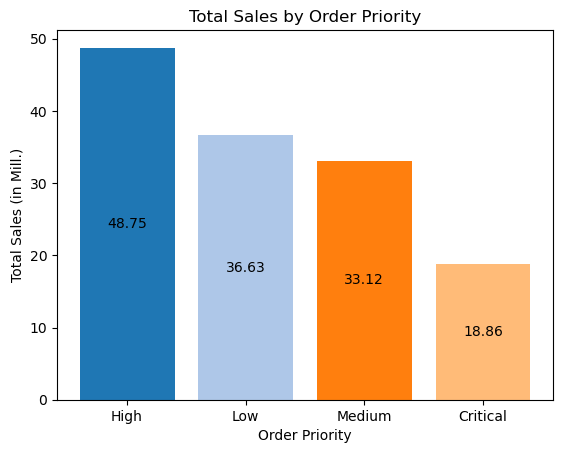

In [365]:
## Creating a bar plot to visualize total sales across different order priorities

# Creating a bar plot with 'Order Priority' on the x-axis and 'Total Sales (in Mill.)' on the y-axis
barplot = plt.bar(Priority_wise['Order Priority'], Priority_wise['Total Sales (in Mill.)'], color=plt.cm.tab20.colors)

# Adding data labels to the bars with center alignment and black color
plt.bar_label(barplot, labels=Priority_wise['Total Sales (in Mill.)'], label_type="center", color="black")    

# Adding labels to the x-axis and y-axis
plt.xlabel('Order Priority')
plt.ylabel('Total Sales (in Mill.)')

# Adding a title to the plot
plt.title('Total Sales by Order Priority')

# Displaying the plot
plt.show()


### ORDER PRIORITY WISE ORDER COUNT

In [366]:
# Grouping by 'Order Priority' and counting the number of orders ('Order ID')
Priority_wise = amz.groupby('Order Priority')['Order ID'].count()

# Converting the resulting Series to a DataFrame and resetting the index to make 'Order Priority' a column
Priority_wise = Priority_wise.reset_index()

# Mapping the priority codes to their corresponding names using the mapping dictionary 'Priority_abbr'
Priority_wise['Order Priority'] = Priority_wise['Order Priority'].map(Priority_abbr)

# Renaming the 'Order ID' column to 'Order Count'
Priority_wise.rename(columns={'Order ID': 'Order Count'}, inplace=True)

# Sorting the DataFrame by 'Order Count' in descending order
Priority_wise.sort_values(by='Order Count', ascending=False, inplace=True)

# Printing the resulting DataFrame
Priority_wise

,Order Priority,Order Count
1,High,30
2,Low,27
0,Critical,22
3,Medium,21


### VISUALIZING ORDER PRIORITY WISE ORDER DISTRIBUTION

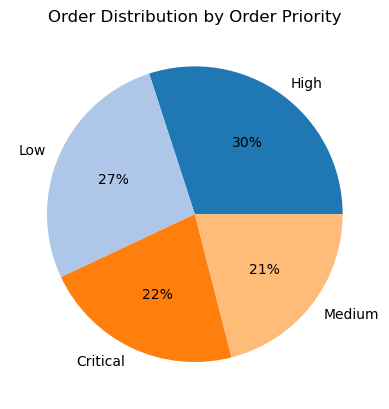

In [367]:
# Creating a pie chart to visualize the distribution of orders by order priority
pieplot = plt.pie(Priority_wise['Order Count'], labels = Priority_wise['Order Priority'], autopct='%1.f%%', colors=plt.cm.tab20.colors)

# Adding a title to the pie chart
plt.title('Order Distribution by Order Priority')

# Displaying the pie chart
plt.show()

### YEAR WISE SALES

In [368]:
# Converting 'Order Date' and 'Ship Date' columns to datetime format
amz['Order Date'] = pd.to_datetime(amz['Order Date'])
amz['Ship Date'] = pd.to_datetime(amz['Ship Date'])

In [369]:
# Grouping the DataFrame by year from the 'Order Date' column and summing the 'Total Revenue' column
Year_wise_Sales = amz.groupby(amz['Order Date'].dt.year)['Total Revenue'].sum()

# Resetting the index to convert the resulting Series to a DataFrame
Year_wise_Sales = Year_wise_Sales.reset_index()

# Converting 'Total Revenue' to million dollars and rounding off to two decimal places
Year_wise_Sales['Total Revenue'] = round(Year_wise_Sales['Total Revenue'] / 1000000, 2)

# Renaming the columns for clarity
Year_wise_Sales.rename(columns={'Total Revenue': 'Total Sales (in Mill.)', 'Order Date': 'Year'}, inplace=True)

# Displaying the resulting DataFrame
Year_wise_Sales

,Year,Total Sales (in Mill.)
0,2010,19.19
1,2011,11.13
2,2012,31.90
3,2013,20.33
4,2014,16.63
5,2015,12.43
6,2016,12.37
7,2017,13.37


### VISUALIZING YEAR WISE SALES

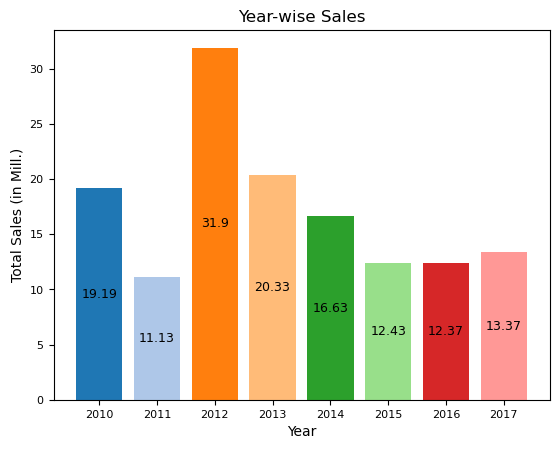

In [370]:
# Creating a bar plot for year-wise total sales
barplot = plt.bar(Year_wise_Sales['Year'], Year_wise_Sales['Total Sales (in Mill.)'], color=plt.cm.tab20.colors)

# Adding data labels to the bars at their centers
plt.bar_label(barplot, labels=Year_wise_Sales['Total Sales (in Mill.)'], label_type="center", color="black", fontsize=9)

# Adding labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Total Sales (in Mill.)')
plt.title('Year-wise Sales')

# Setting font sizes for the tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### MONTH WISE SALES

In [19]:
import calendar

In [371]:
# Grouping by month and summing the total revenue
Month_wise_Sales = amz.groupby(amz['Order Date'].dt.month)['Total Revenue'].sum()

# Resetting the index to make 'Order Date' a column
Month_wise_Sales = Month_wise_Sales.reset_index()

# Converting total revenue to million dollars and rounding off to two decimal places
Month_wise_Sales['Total Revenue'] = round(Month_wise_Sales['Total Revenue'] / 1000000, 2)

# Renaming columns for clarity
Month_wise_Sales.rename(columns={'Order Date': 'Month', 'Total Revenue': 'Total Sales (in Mill.)'}, inplace=True)

# Converting month numbers to month names
Month_wise_Sales['Month'] = Month_wise_Sales['Month'].apply(lambda x: calendar.month_name[x])

# Displaying the DataFrame
Month_wise_Sales


,Month,Total Sales (in Mill.)
0,January,10.48
1,February,24.74
2,March,2.27
3,April,16.19
4,May,13.22
5,June,5.23
6,July,15.67
7,August,1.13
8,September,5.31
9,October,15.29


### VISUALIZING MONTH WISE SALES

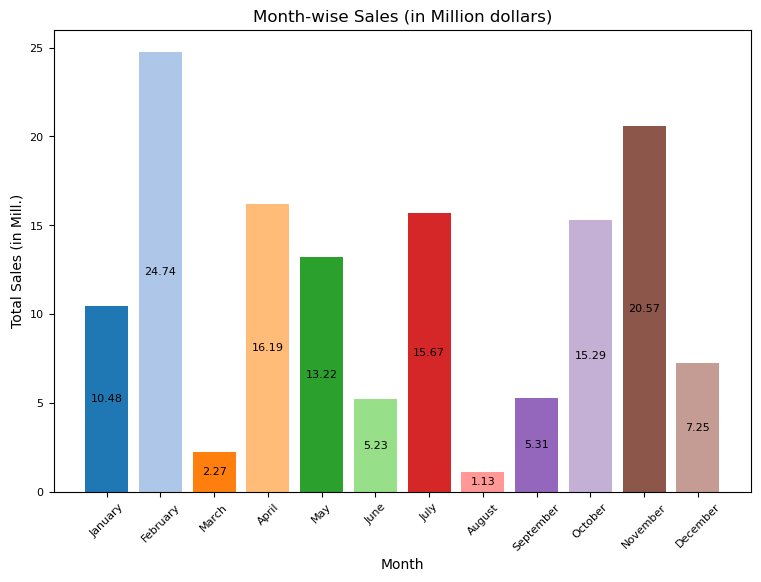

In [372]:
plt.figure(figsize=(9, 6))

# Creating the bar plot
barplot = plt.bar(Month_wise_Sales['Month'], Month_wise_Sales['Total Sales (in Mill.)'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(barplot, labels=Month_wise_Sales['Total Sales (in Mill.)'], label_type="center", color="black", fontsize=8)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales (in Mill.)')
plt.title('Month-wise Sales (in Million dollars)')

# Customizing ticks
plt.xticks(rotation=45, size=8)
plt.yticks(fontsize=8)

# Showing the plot
plt.show()


### MONTH-YEAR WISE SALES

In [373]:
# Group by year and month, sum the 'Total Revenue' column, and reset the index
Year_Month_wise_Sales = amz.groupby([amz['Order Date'].dt.year.rename('Year'), amz['Order Date'].dt.month.rename('Month')])['Total Revenue'].sum().reset_index()

# Convert the 'Total Revenue' to million dollars and round off to two decimal places
Year_Month_wise_Sales['Total Revenue'] = round(Year_Month_wise_Sales['Total Revenue'] / 1000000, 2)

# Map month numbers to month names
Year_Month_wise_Sales['Month'] = Year_Month_wise_Sales['Month'].apply(lambda x: calendar.month_name[x])

# Rename the column 'Total Revenue' to 'Total Sales (in Mill.)'
Year_Month_wise_Sales.rename(columns={'Total Revenue': 'Total Sales (in Mill.)'}, inplace=True)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set month column as categorical with the defined order
Year_Month_wise_Sales['Month'] = pd.Categorical(Year_Month_wise_Sales['Month'], categories=month_order, ordered=True)

# Pivot the DataFrame to have years as rows and months as columns
Year_Month_wise_Sales = Year_Month_wise_Sales.groupby(['Year', 'Month'])['Total Sales (in Mill.)'].sum().unstack()

# Display the resulting DataFrame
Year_Month_wise_Sales


Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2010,0.00,3.41,0.00,0.00,2.59,1.08,0.00,0.00,0.00,6.06,3.46,2.58
2011,1.04,0.39,0.00,2.80,0.27,0.02,0.10,0.00,0.57,0.00,5.94,0.00
2012,1.01,6.71,0.99,4.56,3.78,2.13,4.45,0.58,4.65,3.04,0.00,0.00
2013,0.00,3.30,0.84,3.26,0.00,1.35,8.55,0.09,0.07,2.70,0.00,0.17
2014,0.00,1.82,0.00,4.51,3.06,0.08,0.69,0.46,0.02,1.35,4.65,0.00
2015,5.51,2.00,0.00,1.06,0.00,0.00,1.29,0.01,0.00,1.90,0.65,0.00
2016,0.00,0.00,0.20,0.00,0.41,0.57,0.60,0.00,0.00,0.22,5.88,4.49
2017,2.91,7.12,0.25,0.00,3.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### VISUALIZING MONTH-YEAR WISE SALES

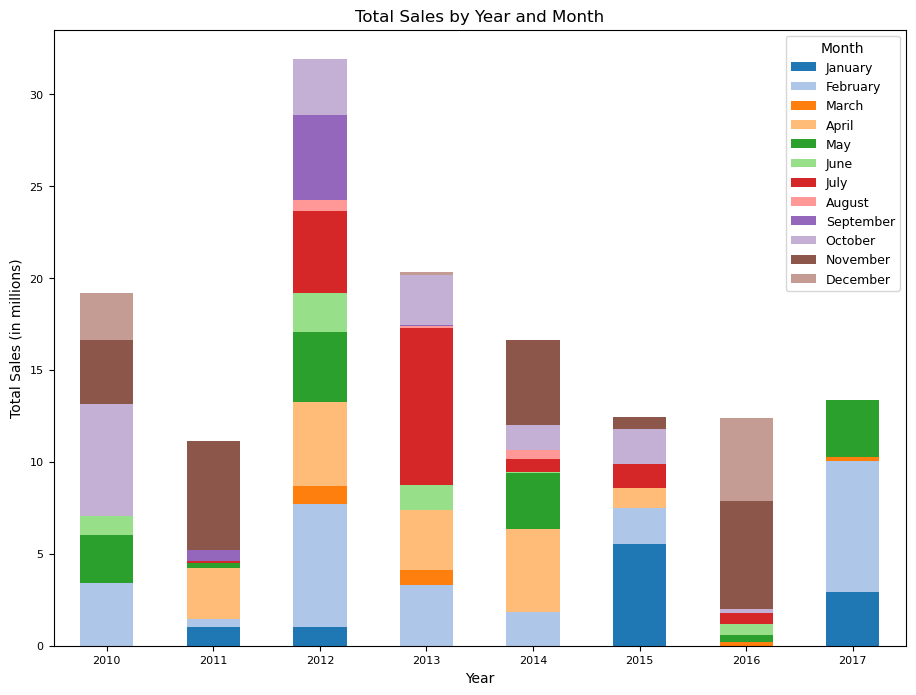

In [374]:
# Plot the stacked bar chart
stack_barplot = Year_Month_wise_Sales.plot(kind='bar', stacked=True, figsize=(11, 8), color=plt.cm.tab20.colors)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.title("Total Sales by Year and Month")

# Add legend with title
plt.legend(title="Month", loc="upper right", fontsize=9)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.show()

### ITEM TYPE WISE UNITS SOLD

In [375]:
# Group by 'Item Type' and sum the 'Units Sold' column
Item_wise_Units = amz.groupby('Item Type')['Units Sold'].sum()

# Reset the index to make 'Item Type' a column
Item_wise_Units = Item_wise_Units.reset_index()

# Convert 'Units Sold' to thousands
Item_wise_Units['Units Sold'] = Item_wise_Units['Units Sold'] / 1000

# Round 'Units Sold' to two decimal places
Item_wise_Units['Units Sold'] = round(Item_wise_Units['Units Sold'], 2)

# Sort the DataFrame by 'Units Sold' in descending order
Item_wise_Units.sort_values(by='Units Sold', ascending=False, inplace=True)

# Rename the 'Units Sold' column
Item_wise_Units.rename(columns={'Units Sold': 'Units Sold (in 1000s)'}, inplace=True)

# Print the resulting DataFrame
Item_wise_Units

,Item Type,Units Sold (in 1000s)
4,Cosmetics,83.72
3,Clothes,71.26
1,Beverages,56.71
5,Fruits,50.00
9,Personal Care,48.71
8,Office Supplies,46.97
6,Household,44.73
0,Baby Food,40.54
2,Cereal,25.88
11,Vegetables,20.05


### VISUALIZING ITEM TYPE WISE UNITS SOLD

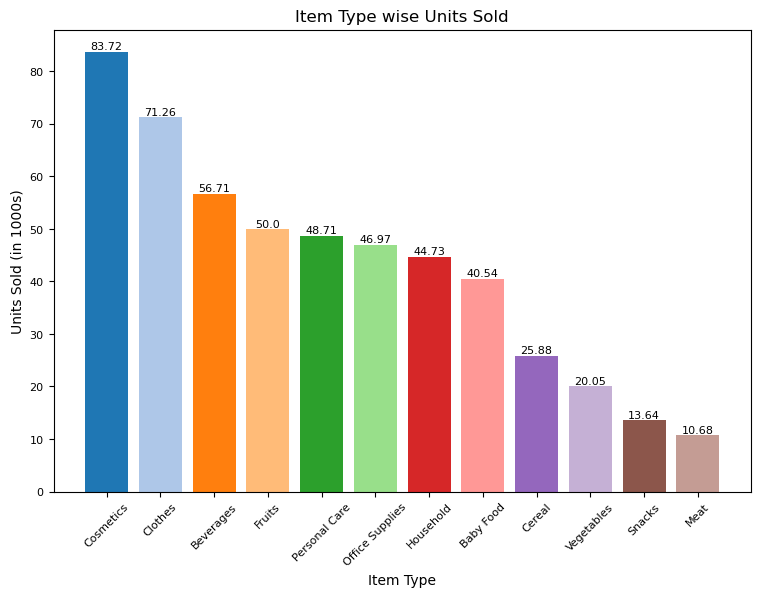

In [398]:
# Create a bar plot for item-wise units sold
plt.figure(figsize=(9, 6))
item_units_barplot = plt.bar(Item_wise_Units['Item Type'], Item_wise_Units['Units Sold (in 1000s)'], color=plt.cm.tab20.colors)

# Add data labels to the bars
plt.bar_label(item_units_barplot, labels=Item_wise_Units['Units Sold (in 1000s)'], label_type='edge', color="black", fontsize=8)

# Set the x-axis and y-axis labels
plt.xlabel('Item Type')
plt.ylabel('Units Sold (in 1000s)')

# Set the title of the plot
plt.title('Item Type wise Units Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, size=8)
plt.yticks(fontsize=8)

# Display the plot
plt.show()


### ITEM TYPE WISE SALES

In [377]:
# Group by 'Item Type' and sum the 'Total Revenue' column
Item_wise_Sales = amz.groupby('Item Type')['Total Revenue'].sum()

# Convert the resulting Series to a DataFrame and reset the index
Item_wise_Sales = Item_wise_Sales.reset_index()

# Convert 'Total Revenue' to million dollars and round off to two decimal places
Item_wise_Sales['Total Revenue'] = Item_wise_Sales['Total Revenue'].apply(lambda x: x/1000000).round(2)

# Sort the DataFrame by 'Total Revenue' in descending order
Item_wise_Sales.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Rename the 'Total Revenue' column to 'Total Sales (in Mill.)'
Item_wise_Sales.rename(columns={'Total Revenue': 'Total Sales (in Mill.)'}, inplace=True)

# Print the resulting DataFrame
Item_wise_Sales

,Item Type,Total Sales (in Mill.)
4,Cosmetics,36.60
8,Office Supplies,30.59
6,Household,29.89
0,Baby Food,10.35
3,Clothes,7.79
2,Cereal,5.32
7,Meat,4.50
9,Personal Care,3.98
11,Vegetables,3.09
1,Beverages,2.69


### VISUALIZING ITEM TYPE WISE SALES

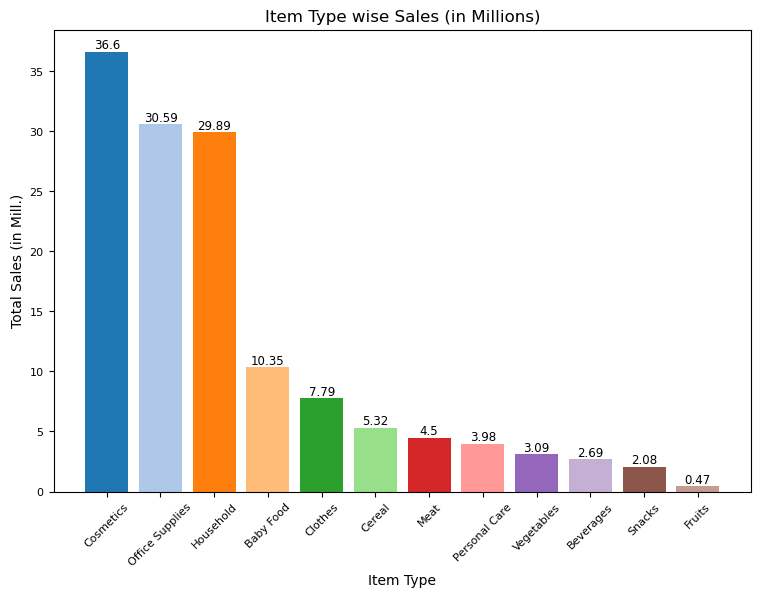

In [380]:
# Create a figure with specified size
plt.figure(figsize=(9, 6))

# Create a bar plot for item-wise sales
item_units_barplot = plt.bar(Item_wise_Sales['Item Type'], Item_wise_Sales['Total Sales (in Mill.)'], color=plt.cm.tab20.colors)

# Add data labels to the bars
plt.bar_label(item_units_barplot, labels=Item_wise_Sales['Total Sales (in Mill.)'], label_type='edge', color="black", fontsize=8.5)

# Set labels and title for the plot
plt.xlabel('Item Type')
plt.ylabel('Total Sales (in Mill.)')
plt.title('Item Type wise Sales (in Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, size=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

### ITEM TYPE WISE PROFIT

In [381]:
# Group by 'Item Type' and sum the 'Total Profit' column
Item_wise_Profit = amz.groupby('Item Type')['Total Profit'].sum()

# Reset the index to make 'Item Type' a column
Item_wise_Profit = Item_wise_Profit.reset_index()

# Convert 'Total Profit' to million dollars and round off to two decimal places
Item_wise_Profit['Total Profit'] = Item_wise_Profit['Total Profit'].apply(lambda x: x / 1000000).round(2)

# Sort the DataFrame by 'Total Profit' in descending order
Item_wise_Profit.sort_values(by='Total Profit', ascending=False, inplace=True)

# Rename the 'Total Profit' column
Item_wise_Profit.rename(columns={'Total Profit': 'Total Profit (in Mill.)'}, inplace=True)

# Print the resulting DataFrame
Item_wise_Profit


,Item Type,Total Profit (in Mill.)
4,Cosmetics,14.56
6,Household,7.41
8,Office Supplies,5.93
3,Clothes,5.23
0,Baby Food,3.89
2,Cereal,2.29
11,Vegetables,1.27
9,Personal Care,1.22
1,Beverages,0.89
10,Snacks,0.75


### VISUALIZING ITEM TYPE WISE PROFIT

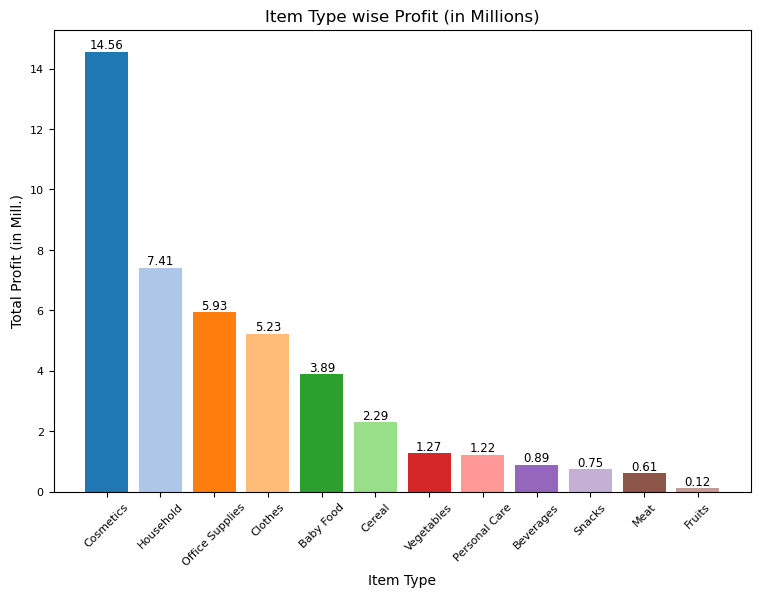

In [399]:
# Plotting a bar chart for item-wise profit

# Importing required libraries
import matplotlib.pyplot as plt

# Creating the figure and setting its size
plt.figure(figsize=(9, 6))

# Creating the bar plot
item_units_barplot = plt.bar(Item_wise_Profit['Item Type'], Item_wise_Profit['Total Profit (in Mill.)'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(item_units_barplot, labels=Item_wise_Profit['Total Profit (in Mill.)'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Item Type')
plt.ylabel('Total Profit (in Mill.)')
plt.title('Item Type wise Profit (in Millions)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()

### ITEM TYPE WISE SALES & PROFIT

In [378]:
# Grouping by 'Item Type' and summing the 'Total Revenue' and 'Total Profit' columns
Item_wise_Sales = amz.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum()

# Resetting the index to make 'Item Type' a column
Item_wise_Sales = Item_wise_Sales.reset_index()

# Converting 'Total Revenue' and 'Total Profit' to million dollars and rounding off to two decimal places
Item_wise_Sales['Total Revenue'] = Item_wise_Sales['Total Revenue'].apply(lambda x: x / 1000000).round(2)
Item_wise_Sales['Total Profit'] = Item_wise_Sales['Total Profit'].apply(lambda x: x / 1000000).round(2)

# Sorting by 'Total Revenue' in descending order
Item_wise_Sales.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Renaming the columns
Item_wise_Sales.rename(columns={'Total Revenue': 'Total Sales (in Mill.)', 'Total Profit': 'Total Profit (in Mill.)'}, inplace=True)

# Printing the resulting DataFrame
Item_wise_Sales

,Item Type,Total Sales (in Mill.),Total Profit (in Mill.)
4,Cosmetics,36.60,14.56
8,Office Supplies,30.59,5.93
6,Household,29.89,7.41
0,Baby Food,10.35,3.89
3,Clothes,7.79,5.23
2,Cereal,5.32,2.29
7,Meat,4.50,0.61
9,Personal Care,3.98,1.22
11,Vegetables,3.09,1.27
1,Beverages,2.69,0.89


### VISUALIZING ITEM TYPE WISE SALES & PROFIT

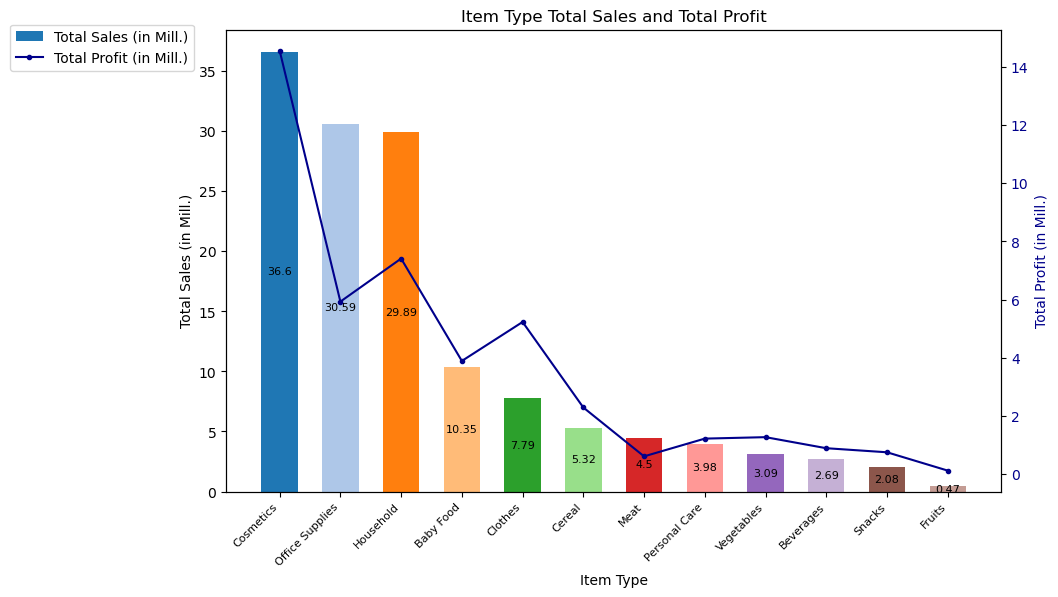

In [274]:
import matplotlib.pyplot as plt

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total sales
bar_width = 0.6
bar_positions = range(len(Item_wise_Sales['Item Type']))
bars = ax1.bar(bar_positions, Item_wise_Sales['Total Sales (in Mill.)'], width=bar_width, color=plt.cm.tab20.colors, label='Total Sales (in Mill.)')

# Add labels to the bars
ax1.bar_label(bars, labels=Item_wise_Sales['Total Sales (in Mill.)'], label_type='center', color='black', fontsize=8)

# Set x-axis labels
ax1.set_xlabel('Item Type')
ax1.set_ylabel('Total Sales (in Mill.)')
ax1.set_title('Item Type Total Sales and Total Profit')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(Item_wise_Sales['Item Type'], rotation=45, ha='right', fontsize=8)

# Create secondary axis
ax2 = ax1.twinx()

# Line plot for total profit
line_plot = ax2.plot(bar_positions, Item_wise_Sales['Total Profit (in Mill.)'], color='darkblue', marker='.', linestyle='-', linewidth=1.5, label='Total Profit (in Mill.)')
ax2.set_ylabel('Total Profit (in Mill.)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Add a legend to indicate what the bars and lines represent
fig.legend(loc='upper right', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


### SALES CHANNEL WISE PROFIT

In [383]:
# Calculating total profit by sales channel

# Grouping by sales channel and summing the total profit
Channel_wise_Profit = amz.groupby('Sales Channel')['Total Profit'].sum()

# Resetting the index to convert the resulting series to a DataFrame
Channel_wise_Profit = Channel_wise_Profit.reset_index()

# Converting total profit to million dollars and formatting it as a string
Channel_wise_Profit['Total Profit'] = Channel_wise_Profit['Total Profit'].apply(lambda x : f"$ {x/1000000:.2f} M")

# Sorting the DataFrame by total profit in descending order
Channel_wise_Profit.sort_values(by='Total Profit', ascending=False, inplace=True)

# Displaying the DataFrame
Channel_wise_Profit


,Sales Channel,Total Profit
0,Offline,$ 24.92 M
1,Online,$ 19.25 M


### SALES CHANNEL WISE SALES & COST

In [382]:
# Calculating total sales and cost by sales channel

# Grouping by sales channel and summing the total revenue and total cost
Channel_wise_Sales_Cost = amz.groupby('Sales Channel')[['Total Revenue','Total Cost']].sum()

# Converting total revenue and total cost to million dollars and rounding to two decimal places
Channel_wise_Sales_Cost['Total Revenue'] = Channel_wise_Sales_Cost['Total Revenue'].apply(lambda x : x/1000000).round(2)
Channel_wise_Sales_Cost['Total Cost'] = Channel_wise_Sales_Cost['Total Cost'].apply(lambda x : x/1000000).round(2)

# Renaming columns for clarity
Channel_wise_Sales_Cost.rename(columns={'Total Revenue': 'Total Sales (in Mill.)', 'Total Cost': 'Total Cost (in Mill.)'}, inplace=True)

# Displaying the DataFrame
Channel_wise_Sales_Cost


,Total Sales (in Mill.),Total Cost (in Mill.)
Sales Channel,,
Offline,79.09,54.17
Online,58.25,39.01


### VISUALIZING SALES CHANNEL WISE SALES & COST

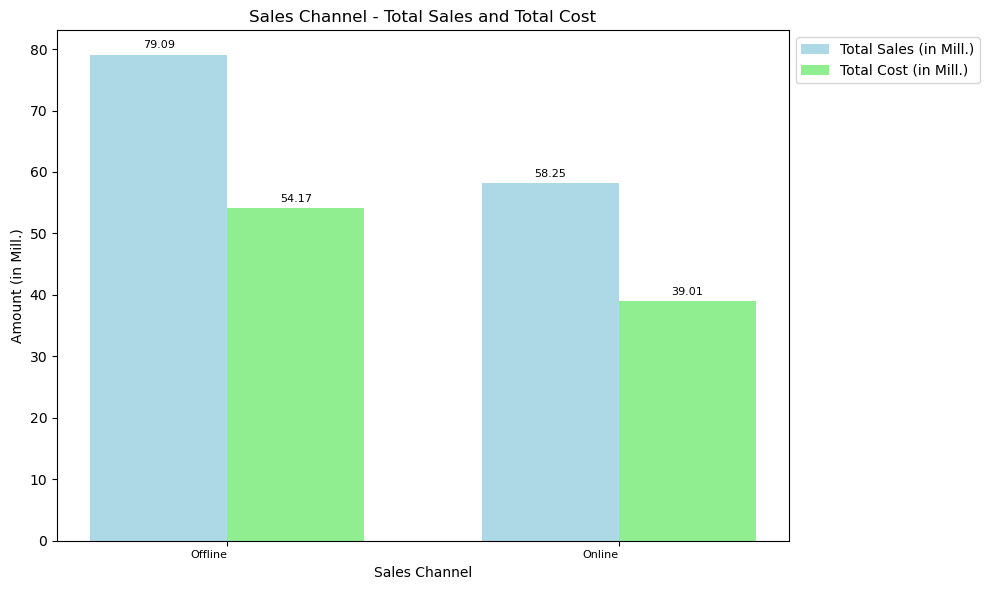

In [308]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and the positions of the bars
bar_width = 0.35
bar_positions = np.arange(len(Channel_wise_Sales_Cost))

# Plot the bars for Total Sales and Total Cost
bars1 = ax.bar(bar_positions, Channel_wise_Sales_Cost['Total Sales (in Mill.)'], width=bar_width, color='lightblue', label='Total Sales (in Mill.)')
bars2 = ax.bar(bar_positions + bar_width, Channel_wise_Sales_Cost['Total Cost (in Mill.)'], width=bar_width, color='lightgreen', label='Total Cost (in Mill.)')

# Add labels to the bars
ax.bar_label(bars1, labels=Channel_wise_Sales_Cost['Total Sales (in Mill.)'], padding=3, fontsize=8, color='black')
ax.bar_label(bars2, labels=Channel_wise_Sales_Cost['Total Cost (in Mill.)'], padding=3, fontsize=8, color='black')

# Set the x-axis labels and ticks
ax.set_xlabel('Sales Channel')
ax.set_ylabel('Amount (in Mill.)')
ax.set_title('Sales Channel - Total Sales and Total Cost')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(Channel_wise_Sales_Cost.index, ha='right', fontsize=8)

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.tight_layout()
plt.show()


### SALES CHANNEL WISE UNITS SOLD

In [405]:
# Grouping the data by 'Sales Channel' and summing up the 'Units Sold' for each channel
Channel_wise_Units = amz.groupby('Sales Channel')['Units Sold'].sum()

# Resetting the index to convert the GroupBy object to a DataFrame and make 'Sales Channel' a column again
Channel_wise_Units = Channel_wise_Units.reset_index()

# Converting the 'Units Sold' values from units to thousands and rounding to two decimal places
Channel_wise_Units['Units Sold'] = Channel_wise_Units['Units Sold'].apply(lambda x : x/1000).round(2)

# Sorting the DataFrame by 'Units Sold' in descending order
Channel_wise_Units.sort_values(by = ['Units Sold'], ascending = False, inplace = True)

# Renaming the 'Units Sold' column to 'Units Sold (in 1000s)' for clarity
Channel_wise_Units.rename(columns = {'Units Sold' : 'Units Sold (in 1000s)'}, inplace = True)

# Displaying the modified DataFrame
Channel_wise_Units


,Sales Channel,Units Sold (in 1000s)
0,Offline,276.78
1,Online,236.09


### VISUALIZING SALES CHANNEL WISE UNITS SOLD

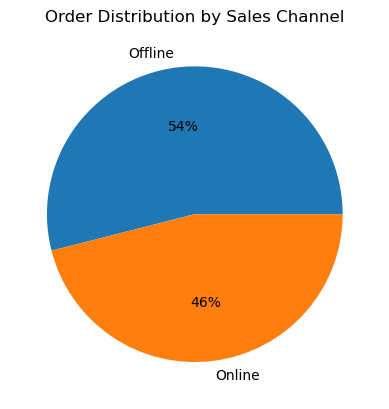

In [281]:
#plt.figure(figsize=(8, 8))
channel_pieplot = plt.pie(Channel_wise_Units['Units Sold (in 1000s)'], labels = Channel_wise_Units['Sales Channel'],autopct='%1.f%%', colors=plt.cm.tab10.colors)

# Add title and labels
plt.title('Order Distribution by Sales Channel')
plt.show()

### REGION WISE TOTAL PROFIT

In [404]:
# Grouping the data by 'Region' and summing up the 'Total Profit' for each region
Region_wise_Profit = amz.groupby('Region')['Total Profit'].sum()

# Resetting the index to convert the GroupBy object to a DataFrame and make 'Region' a column again
Region_wise_Profit = Region_wise_Profit.reset_index()

# Sorting the DataFrame by 'Total Profit' in descending order
Region_wise_Profit.sort_values(by = 'Total Profit', ascending = False, inplace = True)

# Formatting the 'Total Profit' column to display values in millions with a dollar sign and two decimal places
Region_wise_Profit['Total Profit'] = Region_wise_Profit['Total Profit'].apply(lambda x : f" $ {x/1000000:.2f} M")

# Displaying the modified DataFrame
Region_wise_Profit

,Region,Total Profit
6,Sub-Saharan Africa,$ 12.18 M
3,Europe,$ 11.08 M
0,Asia,$ 6.11 M
4,Middle East and North Africa,$ 5.76 M
1,Australia and Oceania,$ 4.72 M
2,Central America and the Caribbean,$ 2.85 M
5,North America,$ 1.46 M


### REGION WISE SALES

In [317]:
# Group by 'Region' and calculate the sum of 'Total Revenue'
Region_wise_Sales = amz.groupby('Region')['Total Revenue'].sum()

# Reset the index to flatten the DataFrame
Region_wise_Sales = Region_wise_Sales.reset_index()

# Sort the values numerically before formatting
Region_wise_Sales.sort_values(by = 'Total Revenue', ascending = False, inplace = True)

# Format 'Total Revenue' to display in millions with a dollar sign
Region_wise_Sales['Total Revenue'] = Region_wise_Sales['Total Revenue'].apply(lambda x: x / 1000000).round(2)

Region_wise_Sales.rename(columns = {'Total Revenue' : 'Total Sales (in Mill.)'}, inplace = True)

# Display the resulting DataFrame
Region_wise_Sales


,Region,Total Sales (in Mill.)
6,Sub-Saharan Africa,39.67
3,Europe,33.37
0,Asia,21.35
1,Australia and Oceania,14.09
4,Middle East and North Africa,14.05
2,Central America and the Caribbean,9.17
5,North America,5.64


### VISUALIZING REGION WISE SALES

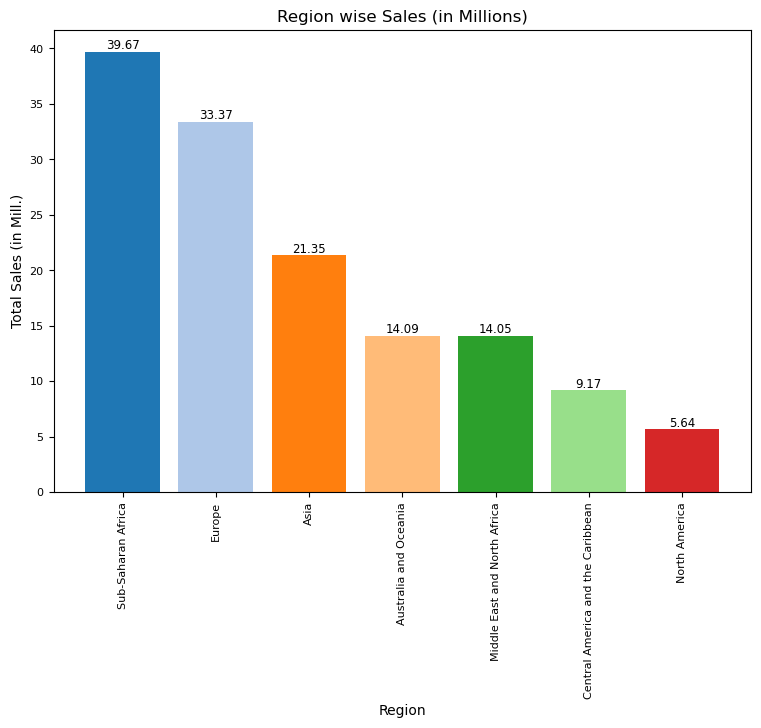

In [403]:
# Setting the figure size to 9 inches by 6 inches
plt.figure(figsize=(9, 6))

# Creating a bar plot for total sales by region with specified colors
item_units_barplot = plt.bar(Region_wise_Sales['Region'], Region_wise_Sales['Total Sales (in Mill.)'], color = plt.cm.tab20.colors)

# Adding labels to the bars with the total sales values, positioning the labels at the edge of the bars
plt.bar_label(item_units_barplot, labels = Region_wise_Sales['Total Sales (in Mill.)'], label_type='edge', color="black", fontsize=8.5)

# Setting the label for the x-axis as 'Region'
plt.xlabel('Region')

# Setting the label for the y-axis as 'Total Sales (in Mill.)'
plt.ylabel('Total Sales (in Mill.)')

# Setting the title of the plot as 'Region wise Sales (in Millions)'
plt.title('Region wise Sales (in Millions)')

# Rotating the x-axis labels by 90 degrees for better readability and setting the font size to 8
plt.xticks(rotation=90, size=8)

# Setting the font size of the y-axis ticks to 8
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### REGION WISE SALES, PROFIT & PROFIT MARGIN

In [337]:
# Group by 'Region' and calculate the sum of 'Total Revenue'
Region_wise_Sales_Profit = amz.groupby('Region')[['Total Revenue','Total Profit']].sum()

# Reset the index to flatten the DataFrame
Region_wise_Sales_Profit = Region_wise_Sales_Profit.reset_index()

# Calculating Region wise Profit Marin 
Region_wise_Sales_Profit['Profit Margin'] = (Region_wise_Sales_Profit['Total Revenue']/Region_wise_Sales_Profit['Total Profit']).round(2)

# Sort the values numerically before formatting
Region_wise_Sales_Profit.sort_values(by = 'Profit Margin', ascending = False, inplace = True)

# Format 'Total Revenue' to display in millions with a dollar sign
Region_wise_Sales_Profit['Total Revenue'] = Region_wise_Sales_Profit['Total Revenue'].apply(lambda x: f"$ {x / 1000000:.2f} M")

# Format 'Total Profit' to display in millions with a dollar sign
Region_wise_Sales_Profit['Total Profit'] = Region_wise_Sales_Profit['Total Profit'].apply(lambda x: f"$ {x / 1000000:.2f} M")


# Display the resulting DataFrame
Region_wise_Sales_Profit

,Region,Total Revenue,Total Profit,Profit Margin
5,North America,$ 5.64 M,$ 1.46 M,3.87
0,Asia,$ 21.35 M,$ 6.11 M,3.49
6,Sub-Saharan Africa,$ 39.67 M,$ 12.18 M,3.26
2,Central America and the Caribbean,$ 9.17 M,$ 2.85 M,3.22
3,Europe,$ 33.37 M,$ 11.08 M,3.01
1,Australia and Oceania,$ 14.09 M,$ 4.72 M,2.98
4,Middle East and North Africa,$ 14.05 M,$ 5.76 M,2.44


### VISUALIZING REGION WISE PROFIT MARGIN

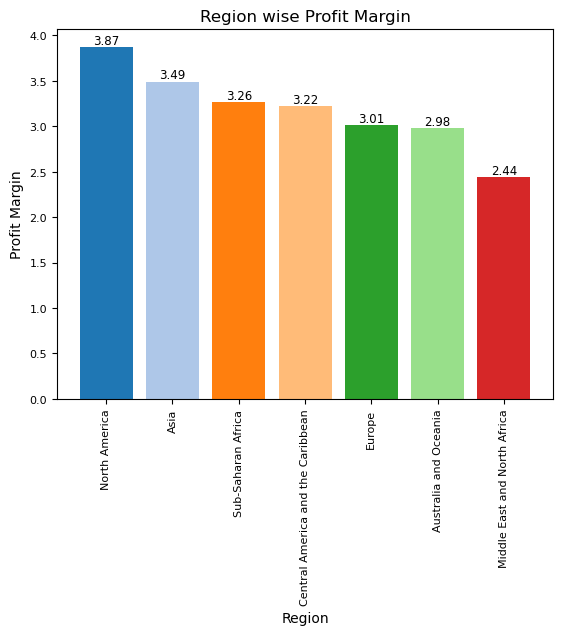

In [402]:
# Creating a bar plot for profit margin of top 10 countries

#plt.figure(figsize=(9, 6))

Region_wise_Profit_margin = Region_wise_Sales_Profit[['Region', 'Profit Margin']]

# Creating the bar plot
Region_profit_bar = plt.bar(Region_wise_Sales_Profit['Region'], Region_wise_Sales_Profit['Profit Margin'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(Region_profit_bar, labels=Region_wise_Sales_Profit['Profit Margin'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Region')
plt.ylabel('Profit Margin')
plt.title('Region wise Profit Margin')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### CREATING A COLUMN DELIVERY TIME

In [388]:
# Calculating delivery time

# Subtracting the 'Order Date' from the 'Ship Date' to calculate delivery time
amz['Delivery_time'] = amz['Ship Date'] - amz['Order Date']

# Displaying the DataFrame with the new 'Delivery_time' column
amz


,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery_time
Region,,,,,,,,,,,,,,
Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6 days
Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15 days
Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,39 days
Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,47 days
Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,28 days


### REGION WISE AVERAGE DELIVERY TIME

In [387]:
# Calculating average delivery time per region

# Grouping by 'Region' and calculating the mean of 'Delivery_time'
Avg_Delivery_time = amz.groupby('Region')['Delivery_time'].mean()

# Resetting the index to make 'Region' a column
Avg_Delivery_time = Avg_Delivery_time.reset_index()

# Sorting the DataFrame by 'Delivery_time'
Avg_Delivery_time.sort_values(by='Delivery_time', inplace=True)

# Converting delivery time from timedelta to days and rounding off to two decimal places
Avg_Delivery_time['Delivery_time'] = Avg_Delivery_time['Delivery_time'].apply(lambda x: x.total_seconds() / 86400).round(2)

# Renaming the 'Delivery_time' column to 'Avg_Del_time (in Days)'
Avg_Delivery_time.rename(columns={'Delivery_time': 'Avg_Del_time (in Days)'}, inplace=True)

# Displaying the resulting DataFrame
Avg_Delivery_time


,Region,Avg_Del_time (in Days)
6,Sub-Saharan Africa,19.89
3,Europe,24.14
4,Middle East and North Africa,24.20
1,Australia and Oceania,24.27
5,North America,25.67
2,Central America and the Caribbean,26.71
0,Asia,28.73


### VISUALIZING REGION WISE AVERAGE DELIVERY TIME

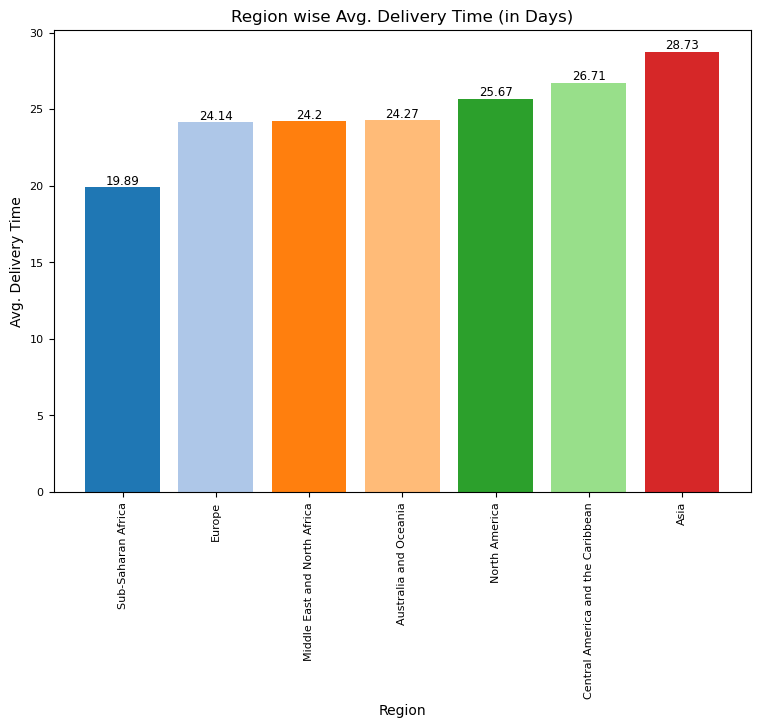

In [386]:
# Creating a bar plot for average delivery time per region

plt.figure(figsize=(9, 6))

# Creating the bar plot
item_units_barplot = plt.bar(Avg_Delivery_time['Region'], Avg_Delivery_time['Avg_Del_time (in Days)'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(item_units_barplot, labels=Avg_Delivery_time['Avg_Del_time (in Days)'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Region')
plt.ylabel('Avg. Delivery Time')
plt.title('Region wise Avg. Delivery Time (in Days)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### COUNTRY WISE SALES, PROFIT & PROFIT MARGIN

In [350]:
# Group by 'Region' and calculate the sum of 'Total Revenue'
Country_wise_Sales_Profit = amz.groupby('Country')[['Total Revenue','Total Profit']].sum()

# Reset the index to flatten the DataFrame
Country_wise_Sales_Profit = Country_wise_Sales_Profit.reset_index()

# Calculating Region wise Profit Marin 
Country_wise_Sales_Profit['Profit Margin'] = (Country_wise_Sales_Profit['Total Revenue']/Country_wise_Sales_Profit['Total Profit']).round(2)

# Sort the values numerically before formatting
Country_wise_Sales_Profit.sort_values(by = 'Profit Margin', ascending = False, inplace = True)

# Format 'Total Revenue' to display in millions with a dollar sign
Country_wise_Sales_Profit['Total Revenue'] = Country_wise_Sales_Profit['Total Revenue'].apply(lambda x: f"$ {x / 1000000:.2f} M")

# Format 'Total Profit' to display in millions with a dollar sign
Country_wise_Sales_Profit['Total Profit'] = Country_wise_Sales_Profit['Total Profit'].apply(lambda x: f"$ {x / 1000000:.2f} M")

# Display the resulting DataFrame
Country_wise_Sales_Profit.head(10)

,Country,Total Revenue,Total Profit,Profit Margin
17,East Timor,$ 2.49 M,$ 0.34 M,7.38
40,Mauritania,$ 0.82 M,$ 0.16 M,5.16
7,Brunei,$ 4.37 M,$ 0.85 M,5.16
55,Russia,$ 1.16 M,$ 0.22 M,5.16
35,Lithuania,$ 5.40 M,$ 1.05 M,5.16
10,Cameroon,$ 3.85 M,$ 0.78 M,4.93
62,Sierra Leone,$ 3.10 M,$ 0.65 M,4.77
72,Turkmenistan,$ 5.82 M,$ 1.27 M,4.59
8,Bulgaria,$ 2.78 M,$ 0.63 M,4.44
2,Australia,$ 2.49 M,$ 0.58 M,4.32


### PROFIT MARGIN WISE TOP 10 COUNTRIES

In [353]:
# Creating a new DataFrame with only 'Country' and 'Profit Margin' columns
country_profit_margin = Country_wise_Sales_Profit[['Country', 'Profit Margin']].head(10)

# Display the new DataFrame
country_profit_margin

,Country,Profit Margin
17,East Timor,7.38
40,Mauritania,5.16
7,Brunei,5.16
55,Russia,5.16
35,Lithuania,5.16
10,Cameroon,4.93
62,Sierra Leone,4.77
72,Turkmenistan,4.59
8,Bulgaria,4.44
2,Australia,4.32


### VISUALIZING PROFIT MARGIN WISE TOP 10 COUNTRIES

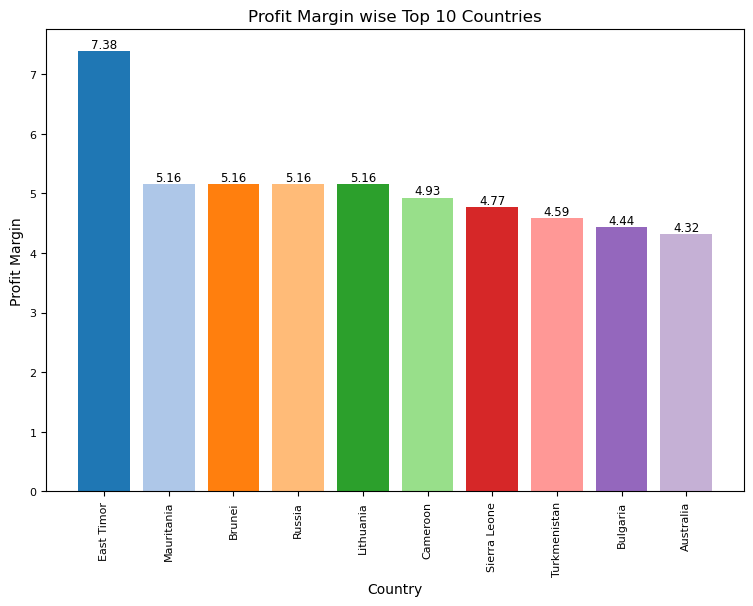

In [385]:
# Creating a bar plot for profit margin of top 10 countries

plt.figure(figsize=(9, 6))

# Creating the bar plot
country_profit_bar = plt.bar(country_profit_margin['Country'], country_profit_margin['Profit Margin'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(country_profit_bar, labels=country_profit_margin['Profit Margin'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Profit Margin')
plt.title('Profit Margin wise Top 10 Countries')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### PROFIT MARGIN WISE BOTTOM 10 COUNTRIES

In [352]:
# Creating a new DataFrame with only 'Country' and 'Profit Margin' columns
country_profit_margin = Country_wise_Sales_Profit[['Country', 'Profit Margin']].tail(10)

# Display the new DataFrame
country_profit_margin

,Country,Profit Margin
34,Libya,1.50
14,Cote d'Ivoire,1.49
11,Cape Verde,1.49
19,Fiji,1.49
37,Madagascar,1.49
32,Lebanon,1.49
6,Belize,1.49
5,Bangladesh,1.49
36,Macedonia,1.49
0,Albania,1.49
